In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np

In [2]:
# Let's see our images and what they look like
img = image.load_img("train/Ayodele/3.jpg")

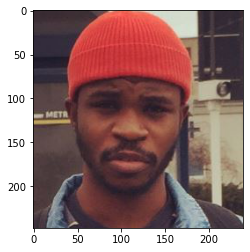

In [3]:
plt.imshow(img)

In [4]:
# the 3 dimensional structure of the picture in an array
cv2.imread("train/Ayodele/17.jpg")

array([[[152, 189, 227],
        [152, 189, 227],
        [152, 189, 227],
        ...,
        [135, 159, 195],
        [135, 159, 195],
        [135, 159, 195]],

       [[152, 189, 227],
        [152, 189, 227],
        [152, 189, 227],
        ...,
        [135, 159, 195],
        [135, 159, 195],
        [135, 159, 195]],

       [[152, 189, 227],
        [152, 189, 227],
        [152, 189, 227],
        ...,
        [135, 159, 195],
        [135, 159, 195],
        [135, 159, 195]],

       ...,

       [[ 81,  86, 149],
        [ 82,  89, 152],
        [ 81,  86, 149],
        ...,
        [ 62,  61,  87],
        [ 81,  78, 104],
        [ 79,  78, 104]],

       [[ 78,  85, 148],
        [ 82,  89, 152],
        [ 80,  87, 150],
        ...,
        [ 83,  84, 110],
        [ 91,  90, 116],
        [ 89,  90, 116]],

       [[ 74,  83, 146],
        [ 79,  88, 151],
        [ 78,  87, 150],
        ...,
        [ 89,  93, 118],
        [ 86,  87, 113],
        [ 84,  88, 113]]

In [5]:
# shape of the image can be found by
cv2.imread("train/Ayodele/3.jpg").shape

(248, 239, 3)

In [6]:
# we want the rgb values in the array to range from 0 - 1 instead of 1 - 255
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [23]:
# train dataset from our directory, batch size is 3 because our dataset isn't huge
train_dataset = train.flow_from_directory("train/", 
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = "binary")

validation_dataset = validation.flow_from_directory("validation/", 
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 18 images belonging to 1 classes.
Found 8 images belonging to 1 classes.


In [24]:
# to see the labels of our classified images
train_dataset.class_indices

{'Ayodele': 0}

In [25]:
# Defining our model with keras
# Layers are given in form of list.. so here we have 6 neural layers for our model
# we use convolution layer with Conv2D
# 16 is the the number of filters in the first layer
# (3,3) is the size of the filter
# 'relu' is the activation function
# and (200, 200, 3) is the target size we specified above and 3 represents r,g,b 
# and sigmoid in the lat layer because we have a binary classifier i.e Ayodele and Olabisi
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    #
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                   ])

In [27]:
# let's compile our model 
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 0.01),
             metrics = ['accuracy']
             )

In [29]:
# let's fit the model 
model_fit = model.fit(train_dataset, 
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validation_dataset)

Epoch 1/10
3/3 [==============================] - 1s 209ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 1s 211ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 1s 211ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 1s 223ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 225ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 215ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 214ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss

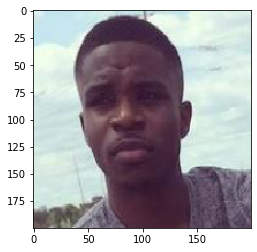

This is Ayodele [[0.]]


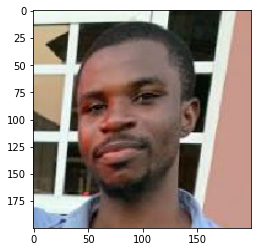

This is Ayodele [[0.]]


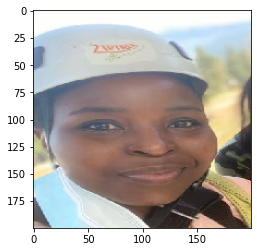

This is Ayodele [[0.]]


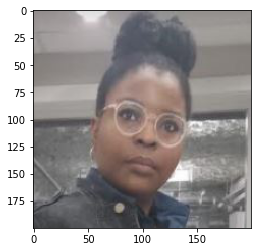

This is Ayodele [[0.]]


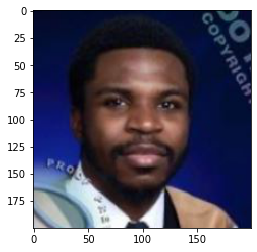

This is Ayodele [[0.]]


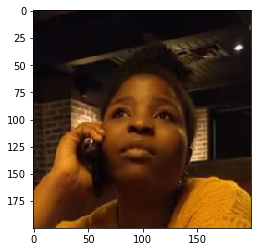

This is Ayodele [[0.]]


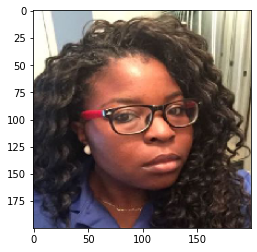

This is Ayodele [[0.]]


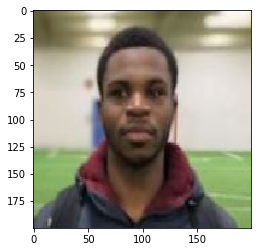

This is Ayodele [[0.]]


In [31]:
# test our model with the test data gathered
dir_path = 'testing/'

for file in os.listdir(dir_path):
    img = image.load_img(os.path.join(dir_path, file), target_size = (200, 200))
    plt.imshow(img)
    plt.show()
    
    # convert image to array to test them
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    
    if val == 0:
        print("This is Ayodele", val)
    else:
        print("Val is ", val)
    